In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from astropy.time import Time
import palettable
# added by Arash: These are to compile tick labels and axis labels with Latex
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import SkyCoord
import pyregion
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
import matplotlib.gridspec as gridspec
import  mpl_toolkits.axisartist.angle_helper as angle_helper
import matplotlib.cm as cmap
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

from mpl_toolkits.axisartist import SubplotHost

from mpl_toolkits.axisartist import GridHelperCurveLinear

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, \
    ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear
from astropy.io import ascii
import astropy.table as Table
import sys

In [57]:
#c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))

In [58]:
#ra, dec = c.ra.to_string(u.hour), c.dec.to_string(u.hour)

In [59]:
region_name="../regions/wavdetect_00321.reg"
r = pyregion.open(region_name)
print r[0].coord_format

fk5


In [60]:
print r[0].coord_list
xcor=[]
ycor=[]
rad1_0=[]
rad2_0=[]
deg_0=[]

[187.4058625, 7.825780555555555, 0.00025930666666666664, 0.0, 90.0]


In [61]:
for i in range(len(r)):

    x=r[i].coord_list[0]
    y=r[i].coord_list[1]
    rad1=r[i].coord_list[2]
    rad2=r[i].coord_list[3]
    deg=r[i].coord_list[4]
    
    if np.size(xcor)<1:
        xcor=x
        ycor=y
        rad1_0=rad1
        rad2_0=rad2
        deg_0=deg
    else:
        xcor=np.vstack((xcor, x))
        ycor=np.vstack((ycor, y))
        rad1_0=np.vstack((rad1_0, rad1))
        rad2_0=np.vstack((rad2_0, rad2))
        deg_0=np.vstack((deg_0, deg))
        

In [62]:
#c = SkyCoord(xcor, ycor, frame='fk5', unit='deg')

In [63]:
#ra, dec = c.ra.to_string(u.hour), c.dec.to_string(u.degree)

In [64]:
#print ra[0], dec[0]

In [65]:
#print len(r)

In [66]:
##convert to radians
ra_rad=xcor
dec_rad=ycor
ra_rad = [j / 180.0 * 3.141593 for j in ra_rad]
dec_rad = [k / 180.0 * 3.141593 for k in dec_rad]

print ra_rad[0], ycor[0]
print xcor[0]
print 0.975000000*(np.pi/180)

[ 3.2708497] [ 7.82578056]
[ 187.4058625]
0.0170169602069


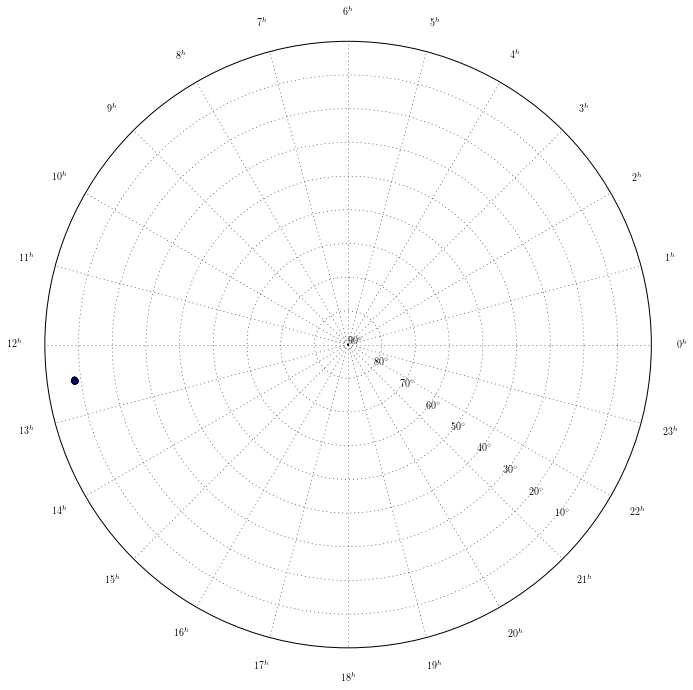

In [67]:
##https://stackoverflow.com/questions/29525356/produce-a-ra-vs-dec-equatorial-coordinates-plot-with-python
# Make plot.
fig = plt.figure(figsize=(50, 50))
gs = gridspec.GridSpec(4, 2)
# Position plot in figure using gridspec.
ax = plt.subplot(gs[0], polar=True)
ax.set_ylim(-90, -0)

# Set x,y ticks
angs = np.array([ 0., 15., 30., 45., 60., 75., 90., 105., 120., 135., 150., 165., 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345 ])
plt.xticks(angs * np.pi / 180., fontsize=8)
plt.yticks(np.arange(-90, -5, 10), fontsize=8)
ax.set_rlabel_position(320)
ax.set_xticklabels(['$0^h$', '$1^h$', '$2^h$', '$3^h$',
    '$4^h$', '$5^h$', '$6^h$', '$7^h$', '$8^h$', '$9^h$', '$10^h$', '$11^h$', '$12^h$', '$13^h$', '$14^h$', '$15^h$', '$16^h$', '$17^h$', '$18^h$', '$19^h$', '$20^h$', '$21^h$', '$22^h$', '$23^h$'  ], fontsize=10)
ax.set_yticklabels(['$90^{\circ}$','$80^{\circ}$', '$70^{\circ}$', '$60^{\circ}$', '$50^{\circ}$', '$40^{\circ}$', '$30^{\circ}$', '$20^{\circ}$', '$10^{\circ}$',  '$0^{\circ}$'],
    fontsize=10)


# Plot points.
#ax.scatter(xcor, ycor, marker='o', c='m', s=6, lw=0.)
ax.scatter(xcor*(np.pi/180),-ycor)

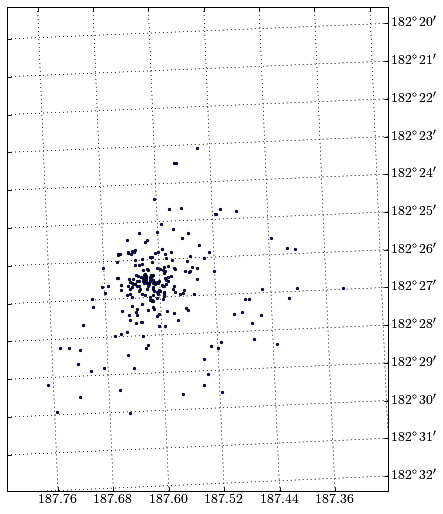

In [68]:
def curvelinear_test2(fig):
    """
    polar projection, but in a rectangular box.
    """

    # PolarAxes.PolarTransform takes radian. However, we want our coordinate
    # system in degree
    tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    # polar projection, which involves cycle, and also has limits in
    # its coordinates, needs a special method to find the extremes
    # (min, max of the coordinate within the view).

    # 20, 20 : number of sampling points along x, y direction
    extreme_finder = angle_helper.ExtremeFinderCycle(20, 20,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(0, np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)
    # Find a grid values appropriate for the coordinate (degree,
    # minute, second).

    tick_formatter1 = angle_helper.FormatterDMS()
    # And also uses an appropriate formatter.  Note that,the
    # acceptable Locator and Formatter class is a bit different than
    # that of mpl's, and you cannot directly use mpl's Locator and
    # Formatter here (but may be possible in the future).

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = SubplotHost(fig, 1, 2, 2, grid_helper=grid_helper)

    # make ticklabels of right and top axis visible.
    ax1.axis["right"].major_ticklabels.set_visible(True)
    ax1.axis["top"].major_ticklabels.set_visible(True)

    # let right axis shows ticklabels for 1st coordinate (angle)
    ax1.axis["right"].get_helper().nth_coord_ticks = 0
    # let bottom axis shows ticklabels for 2nd coordinate (radius)
    ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

    fig.add_subplot(ax1)

    # A parasite axes with given transform
    ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
    # note that ax2.transData == tr + ax1.transData
    # Anything you draw in ax2 will match the ticks and grids of ax1.
    ax1.parasites.append(ax2)
    intp = cbook.simple_linear_interpolation
    #ax2.plot(intp(np.array([0, 30]), 50),
             #intp(np.array([10., 10.]), 50),
             #linewidth=2.0)
    angs = np.array([ 0., 15., 30., 45., 60., 75., 90., 105., 120., 135., 150., 165., 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345 ])
    plt.xticks(angs * np.pi / 180., fontsize=8)
    plt.yticks(np.arange(-90, -5, 10), fontsize=8)
    #ax1.set_rlabel_position(320)
    ax1.set_xticklabels(['$0^h$', '$1^h$', '$2^h$', '$3^h$',
    '$4^h$', '$5^h$', '$6^h$', '$7^h$', '$8^h$', '$9^h$', '$10^h$', '$11^h$', '$12^h$', '$13^h$', '$14^h$', '$15^h$', '$16^h$', '$17^h$', '$18^h$', '$19^h$', '$20^h$', '$21^h$', '$22^h$', '$23^h$'  ], fontsize=10)
    ax1.set_yticklabels(['$90^{\circ}$','$80^{\circ}$', '$70^{\circ}$', '$60^{\circ}$', '$50^{\circ}$', '$40^{\circ}$', '$30^{\circ}$', '$20^{\circ}$', '$10^{\circ}$',  '$0^{\circ}$'],
    fontsize=10)
    ax1.set_aspect(1.)
    ax1.set_xlim(-187.65, -187.1)
    ax1.set_ylim(-8.3, -7.6)

    ax1.scatter(-xcor,-ycor, marker='.')
    ax1.grid(True, zorder=0)
    

fig = plt.figure(1, figsize=(15, 15))
fig.clf()

   
curvelinear_test2(fig)

In [69]:
region_name322="../regions/wavdetect_00322.reg"
r322 = pyregion.open(region_name322)
xcor322=[]
ycor322=[]
for i in range(len(r322)):

    x322=r322[i].coord_list[0]
    y322=r322[i].coord_list[1]

    if np.size(xcor322)<1:
     
        xcor322=x322
        ycor322=y322
       
    else:
        xcor322=np.vstack((xcor322, x322))
        ycor322=np.vstack((ycor322, y322))
      


In [70]:
region_name12978="../regions/wavdetect_12978.reg"
r12978 = pyregion.open(region_name12978)
xcor12978=[]
ycor12978=[]
for i in range(len(r12978)):

    x12978=r12978[i].coord_list[0]
    y12978=r12978[i].coord_list[1]

    if np.size(xcor12978)<1:
     
        xcor12978=x12978
        ycor12978=y12978
       
    else:
        xcor12978=np.vstack((xcor12978, x12978))
        ycor12978=np.vstack((ycor12978, y12978))
      


In [71]:
region_name12888="../regions/wavdetect_12888.reg"
r12888 = pyregion.open(region_name12888)
xcor12888=[]
ycor12888=[]
for i in range(len(r12888)):

    x12888=r12888[i].coord_list[0]
    y12888=r12888[i].coord_list[1]

    if np.size(xcor12888)<1:
     
        xcor12888=x12888
        ycor12888=y12888
       
    else:
        xcor12888=np.vstack((xcor12888, x12888))
        ycor12888=np.vstack((ycor12888, y12888))
      


In [72]:
region_name11274="../regions/wavdetect_11274.reg"
r11274 = pyregion.open(region_name11274)
xcor11274=[]
ycor11274=[]
for i in range(len(r11274)):

    x11274=r11274[i].coord_list[0]
    y11274=r11274[i].coord_list[1]

    if np.size(xcor11274)<1:
     
        xcor11274=x11274
        ycor11274=y11274
       
    else:
        xcor11274=np.vstack((xcor11274, x11274))
        ycor11274=np.vstack((ycor11274, y11274))
      


In [73]:
region_name12889="../regions/wavdetect_12889.reg"
r12889 = pyregion.open(region_name12889)
xcor12889=[]
ycor12889=[]
for i in range(len(r12889)):

    x12889=r12889[i].coord_list[0]
    y12889=r12889[i].coord_list[1]

    if np.size(xcor12889)<1:
     
        xcor12889=x12889
        ycor12889=y12889
       
    else:
        xcor12889=np.vstack((xcor12889, x12889))
        ycor12889=np.vstack((ycor12889, y12889))
      


In [74]:
region_name16260="../regions/wavdetect_16260.reg"
r16260 = pyregion.open(region_name16260)
xcor16260=[]
ycor16260=[]
for i in range(len(r16260)):

    x16260=r16260[i].coord_list[0]
    y16260=r16260[i].coord_list[1]

    if np.size(xcor16260)<1:
     
        xcor16260=x16260
        ycor16260=y16260
       
    else:
        xcor16260=np.vstack((xcor16260, x16260))
        ycor16260=np.vstack((ycor16260, y16260))
      


In [75]:
region_name16261="../regions/wavdetect_16261.reg"
r16261 = pyregion.open(region_name16261)
xcor16261=[]
ycor16261=[]
for i in range(len(r16261)):

    x16261=r16261[i].coord_list[0]
    y16261=r16261[i].coord_list[1]

    if np.size(xcor16261)<1:
     
        xcor16261=x16261
        ycor16261=y16261
       
    else:
        xcor16261=np.vstack((xcor16261, x16261))
        ycor16261=np.vstack((ycor16261, y16261))
      


In [76]:
region_name16262="../regions/wavdetect_16262.reg"
r16262 = pyregion.open(region_name16262)
xcor16262=[]
ycor16262=[]
for i in range(len(r16262)):

    x16262=r16262[i].coord_list[0]
    y16262=r16262[i].coord_list[1]

    if np.size(xcor16262)<1:
     
        xcor16262=x16262
        ycor16262=y16262
       
    else:
        xcor16262=np.vstack((xcor16262, x16262))
        ycor16262=np.vstack((ycor16262, y16262))
      


In [77]:
print xcor[0], xcor322[0], ycor[0], ycor322[0]

[ 187.4058625] [ 187.42488333] [ 7.82578056] [ 7.98015278]


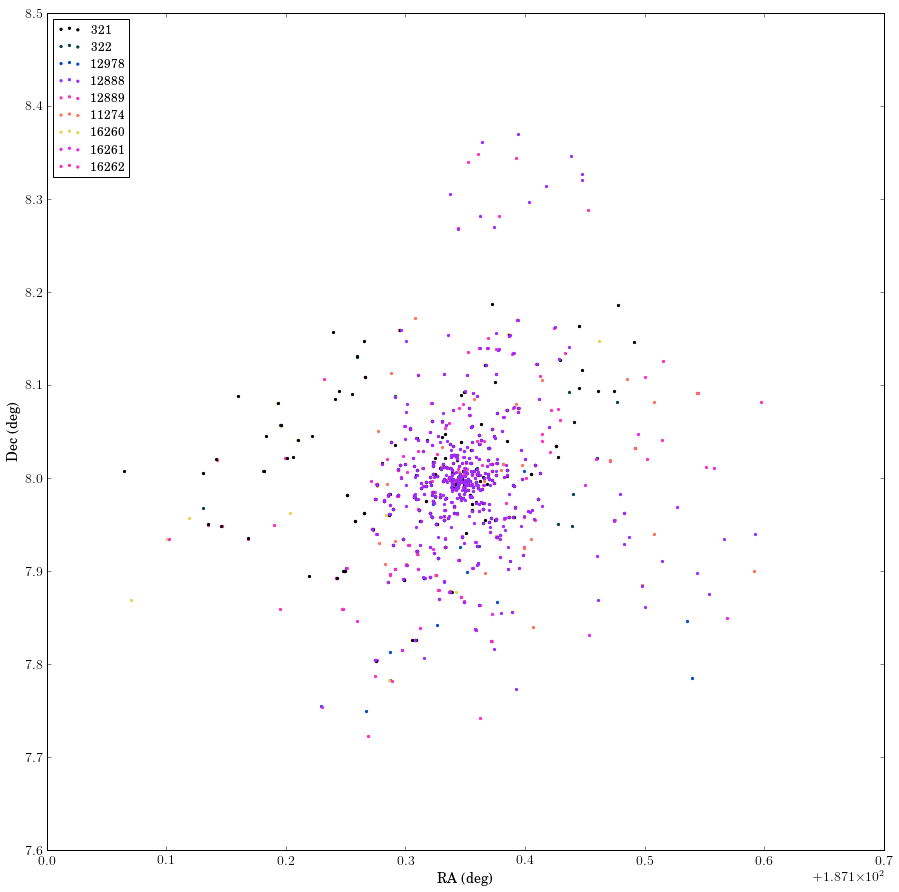

In [78]:
plt.figure(1, figsize=(15, 15))
plt.scatter(xcor, ycor, marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[0], label='321', zorder=9)
plt.scatter(xcor322, ycor322, marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[2], label='322')
plt.scatter(xcor12978, ycor12978, marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[4], label='12978')
plt.scatter(xcor12888, ycor12888, marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[6], label='12888', zorder=10)
plt.scatter(xcor12889, ycor12889,marker='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], label='12889')
plt.scatter(xcor11274, ycor11274,marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[10], label='11274')
plt.scatter(xcor16260, ycor16260, marker='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[12], label='16260')
plt.scatter(xcor16261, ycor16261,marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[7], label='16261')
plt.scatter(xcor16262, ycor16262,marker='.',  color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], label='16262')
plt.legend(loc=2,numpoints=1,fontsize=12)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.savefig('../wavdetect_regplot.png')

In [79]:
# works only for ICRS coordinates?
##test for one region in my list
test =SkyCoord("12h29m56.755s +07d57m28.36s", frame='icrs')
dist = 1 * u.arcsecond
Simbad.ROW_LIMIT = 15 # now any query fetches at most 15 rows

In [80]:
result_table = Simbad.query_region(test, radius=dist)

In [81]:
result_table.pprint(show_unit=True)

       MAIN_ID             RA      ... COO_WAVELENGTH     COO_BIBCODE    
                        "h:m:s"    ...                                   
--------------------- ------------ ... -------------- -------------------
2XMM J122956.8+075728 12 29 56.755 ...              N 2003yCat.2246....0C


In [82]:
c1 = SkyCoord(xcor,ycor, unit=(u.deg, u.deg))
ra1, dec1 = c1.ra.to_string(u.hour), c1.dec.to_string(u.deg)
print ra1[6], dec1[6]
print xcor[6], ycor[6]
print c1[6]

[u'12h29m56.759s'] [u'7d57m28.19s']
[ 187.48649583] [ 7.95783056]
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48649583,  7.95783056)>


In [83]:
#test1 =SkyCoord(ra1[6], dec1[6], frame='icrs')

In [84]:

result_table = Simbad.query_region(SkyCoord(xcor[4],ycor[4], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
c1 = SkyCoord(xcor[4],ycor[4], unit=(u.deg, u.deg))
ra1, dec1 = c1.ra.to_string(u.hour), c1.dec.to_string(u.deg)
print ra1, dec1

[u'12h29m43.79s'] [u'7d57m15.59s']


In [85]:
result_table.pprint(show_unit=True)

         MAIN_ID               RA     ... COO_WAVELENGTH     COO_BIBCODE    
                            "h:m:s"   ...                                   
-------------------------- ---------- ... -------------- -------------------
        [MKZ2003] OID  277 12 29 43.8 ...              O 2003ApJ...586..814M
        [MKZ2003] OID  273 12 29 43.8 ...              O 2003ApJ...586..814M
[CHP2004] J122943.8+075715 12 29 43.8 ...              X 2004ApJ...602..231C


In [86]:
##customize it
customSimbad = Simbad()
customSimbad.get_votable_fields()
customSimbad.add_votable_fields('otype')
customSimbad.add_votable_fields('coo_bibcode')


In [87]:
customSimbad.get_votable_fields()

['main_id', 'coordinates', 'otype', 'coo_bibcode']

In [88]:
result_table_1 = customSimbad.query_region(SkyCoord(xcor[4],ycor[4], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
result_table_2 = customSimbad.query_region(SkyCoord(xcor[6],ycor[6], unit=(u.deg, u.deg), frame='fk5'), radius=dist)


Table.vstack([result_table_1, result_table_2], join_type ='exact')

#print result_table_1, result_table_2

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,OTYPE,COO_BIBCODE_2
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,
object,unicode13,unicode13,int16,int16,float32,float32,int16,unicode1,unicode1,object,object,object
[MKZ2003] OID 277,12 29 43.8,+07 57 16,5,5,--,--,0,D,O,2003ApJ...586..814M,GlCl,2003ApJ...586..814M
[MKZ2003] OID 273,12 29 43.8,+07 57 16,5,5,--,--,0,D,O,2003ApJ...586..814M,GlCl,2003ApJ...586..814M
[CHP2004] J122943.8+075715,12 29 43.8,+07 57 15,5,5,--,--,0,D,X,2004ApJ...602..231C,XB,2004ApJ...602..231C
2XMM J122956.8+075728,12 29 56.755,+07 57 28.36,7,7,120.000,70.000,1,B,N,2003yCat.2246....0C,XB,2003yCat.2246....0C


In [89]:
null_ra=[]
null_dec=[]
stacked_table=[]

In [90]:
#ascii.write(result_table, "test.dat")

In [91]:
for i in range(len(xcor)):
        item=customSimbad.query_region(SkyCoord(xcor[i],ycor[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item is None:
            co = SkyCoord(xcor[i],ycor[i], unit=(u.deg, u.deg))
            print co
            ra_not_found, dec_not_found = co.ra.to_string(u.hour), co.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found, dec_not_found

            if np.size(null_ra)<1:
                null_ra=ra_not_found
                null_dec=dec_not_found
            else:
                null_ra=np.vstack((null_ra, ra_not_found))
                null_dec=np.vstack((null_dec, dec_not_found))
        else:
            if len(stacked_table)<1:
                stacked_table=item
            else:
                stacked_table=Table.vstack([stacked_table, item], join_type ='exact') 
                
        

    

<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4058625,  7.82578056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.407s'] [u'7d49m32.81s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46643333,  7.95493056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.944s'] [u'7d57m17.75s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4905125,  7.95820833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.723s'] [u'7d57m29.55s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43907917,  7.98786667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.379s'] [u'7d59m16.32s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45429167,  7.99196667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.03s'] [u'7d59m31.08s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42164167,  7.99194722)>
No catalog item found for this within 1 arcsecond, saving c

In [92]:
print (stacked_table)

            MAIN_ID                   RA      ...    COO_BIBCODE_2   
                                   "h:m:s"    ...                    
------------------------------- ------------- ... -------------------
          2XMM J122954.3+075613   12 29 54.36 ... 2012ApJ...756...27L
     [CHP2004] J122942.2+075702    12 29 42.2 ... 2004ApJ...602..231C
             [MKZ2003] OID  129    12 29 42.3 ... 2003ApJ...586..814M
          2XMM J122942.2+075701   12 29 42.29 ... 2012ApJ...756...27L
     [CHP2004] J122942.2+075702    12 29 42.2 ... 2004ApJ...602..231C
             [MKZ2003] OID  277    12 29 43.8 ... 2003ApJ...586..814M
             [MKZ2003] OID  273    12 29 43.8 ... 2003ApJ...586..814M
     [CHP2004] J122943.8+075715    12 29 43.8 ... 2004ApJ...602..231C
          2XMM J122956.8+075728  12 29 56.755 ... 2003yCat.2246....0C
          CXOU J122941.0+075744    12 29 41.0 ... 2011MNRAS.410.1655M
                            ...           ... ...                 ...
         CXOMKZ J122

In [93]:
print len(xcor)

237


In [94]:
#ascii.write(stacked_table, "321_src_cat.dat")

In [95]:
null_coords= np.asarray(np.hstack((null_ra, null_dec)))


In [96]:
ascii.write(null_coords, "321_no_cat_val.dat")

In [116]:
ascii.write(stacked_table, 'out_321.txt', format='csv')

In [98]:
stacked_table.remove_column('DEC_PREC')
stacked_table.remove_column('RA_PREC')
stacked_table.remove_column('COO_ERR_MAJA')
stacked_table.remove_column('COO_ERR_MINA')
stacked_table.remove_column('COO_ERR_ANGLE')
stacked_table.remove_column('COO_QUAL')


In [99]:
#ascii.write(stacked_table, 'out.txt', Writer = ascii.Latex, latexdict = {'tabletype': 'table*'})

In [100]:
### now let's do this for everything.

null_ra_322=[]
null_dec_322=[]
stacked_table_322=[]
for i in range(len(xcor322)):
        item322=customSimbad.query_region(SkyCoord(xcor322[i],ycor322[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item322 is None:
            co322 = SkyCoord(xcor322[i],ycor322[i], unit=(u.deg, u.deg))
            print co322
            ra_not_found322, dec_not_found322 = co322.ra.to_string(u.hour), co322.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found322, dec_not_found322

            if np.size(null_ra_322)<1:
                null_ra_322=ra_not_found322
                null_dec_322=dec_not_found322
            else:
                null_ra_322=np.vstack((null_ra_322, ra_not_found322))
                null_dec_322=np.vstack((null_dec_322, dec_not_found322))
        else:
            if len(stacked_table_322)<1:
                stacked_table_322=item322
            else:
                stacked_table_322=Table.vstack([stacked_table_322, item322], join_type ='exact') 
                
        

    

<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4480125,  7.99787778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.523s'] [u'7d59m52.36s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46195417,  8.03643611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.869s'] [u'8d02m11.17s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.231125,  7.96755)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m55.47s'] [u'7d58m03.18s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49735,  7.99854167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.364s'] [u'7d59m54.75s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47222083,  8.05259167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.333s'] [u'8d03m09.33s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.57717083,  8.08188056)>
No catalog item found for this within 1 arcsecond, saving coordina

In [101]:
stacked_table_322.remove_column('DEC_PREC')
stacked_table_322.remove_column('RA_PREC')
stacked_table_322.remove_column('COO_ERR_MAJA')
stacked_table_322.remove_column('COO_ERR_MINA')
stacked_table_322.remove_column('COO_ERR_ANGLE')
stacked_table_322.remove_column('COO_QUAL')

null_coords322= np.asarray(np.hstack((null_ra_322, null_dec_322)))

ascii.write(null_coords322, "322_no_cat_val.dat")
ascii.write(stacked_table_322, 'out_322.txt', format='csv')

In [102]:
### now let's do this for everything.

null_ra_11274=[]
null_dec_11274=[]
stacked_table_11274=[]
for i in range(len(xcor11274)):
        item11274=customSimbad.query_region(SkyCoord(xcor11274[i],ycor11274[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item11274 is None:
            co11274 = SkyCoord(xcor11274[i],ycor11274[i], unit=(u.deg, u.deg))
            print co11274
            ra_not_found11274, dec_not_found11274 = co11274.ra.to_string(u.hour), co11274.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found11274, dec_not_found11274

            if np.size(null_ra_11274)<1:
                null_ra_11274=ra_not_found11274
                null_dec_11274=dec_not_found11274
            else:
                null_ra_11274=np.vstack((null_ra_11274, ra_not_found11274))
                null_dec_11274=np.vstack((null_dec_11274, dec_not_found11274))
        else:
            if len(stacked_table_11274)<1:
                stacked_table_11274=item11274
            else:
                stacked_table_11274=Table.vstack([stacked_table_11274, item11274], join_type ='exact') 
                
        

    

/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:25.947 +7:56:23.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.6081125,  7.93998056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m25.947s'] [u'7d56m23.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.081 +7:57:17.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4753375,  7.95498889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.081s'] [u'7d57m17.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.75 +7:58:57.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38645833,  7.98255556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.75s'] [u'7d58m57.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.837 +7:58:58.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44515417,  7.98290833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.837s'] [u'7d58m58.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.722 +7:58:58.98': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44884167,  7.98305)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.722s'] [u'7d58m58.98s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.638 +7:59:32.45': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49015833,  7.99234722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.638s'] [u'7d59m32.45s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.314 +7:59:55.98': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.442975,  7.99888333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.314s'] [u'7d59m55.98s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.327 +8:00:13.05': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45552917,  8.003625)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.327s'] [u'8d00m13.05s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.264 +8:00:16.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4511,  8.00453333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.264s'] [u'8d00m16.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.874 +8:00:36.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.449475,  8.01024722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.874s'] [u'8d00m36.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.381 +8:00:47.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49742083,  8.01328333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.381s'] [u'8d00m47.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.667 +8:01:02.06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4236125,  8.01723889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.667s'] [u'8d01m02.06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.757 +8:01:17.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45315417,  8.02143056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.757s'] [u'8d01m17.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.446 +8:01:58.25': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.431025,  8.03284722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.446s'] [u'8d01m58.25s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.751 +8:05:06.63': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45729583,  8.085175)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.751s'] [u'8d05m06.63s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:03.368 +8:06:17.33': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51403333,  8.10481389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m03.368s'] [u'8d06m17.33s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.889 +7:53:53.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46620417,  7.89807778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.889s'] [u'7d53m53.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:45.994 +7:53:57.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.69164167,  7.89930278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m45.994s'] [u'7d53m57.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:31.989 +7:54:26.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3832875,  7.90732222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m31.989s'] [u'7d54m26.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.255 +7:55:15.7': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40939583,  7.92102778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.255s'] [u'7d55m15.7s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.074 +7:55:30.92': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43364167,  7.92525556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.074s'] [u'7d55m30.92s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.791 +7:55:48.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37829583,  7.93023611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.791s'] [u'7d55m48.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.887 +7:55:55.09': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39119583,  7.93196944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.887s'] [u'7d55m55.09s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.341 +7:56:11.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47642083,  7.93665833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.341s'] [u'7d56m11.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.359 +7:56:12.19': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44732917,  7.93671944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.359s'] [u'7d56m12.19s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.978 +7:56:19.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.479075,  7.93868611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.978s'] [u'7d56m19.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.972 +7:56:30.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47071667,  7.94193056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.972s'] [u'7d56m30.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.882 +7:57:19.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50784167,  7.955325)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.882s'] [u'7d57m19.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.019 +7:57:28.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42924583,  7.95782778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.019s'] [u'7d57m28.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.625 +7:58:43.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4484375,  7.9787)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.625s'] [u'7d58m43.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.555 +7:59:10.52': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45647917,  7.98625556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.555s'] [u'7d59m10.52s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.524 +7:59:20.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44385,  7.98908056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.524s'] [u'7d59m20.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.39 +7:59:34.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38495833,  7.99294167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.39s'] [u'7d59m34.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.892 +7:59:52.22': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44955,  7.99783889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.892s'] [u'7d59m52.22s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.212 +7:59:53.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44255,  7.99811111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.212s'] [u'7d59m53.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.591 +7:59:53.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4524625,  7.99825556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.591s'] [u'7d59m53.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.153 +7:59:59.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39647083,  7.99998889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.153s'] [u'7d59m59.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.741 +8:00:03.03': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44475417,  8.00084167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.741s'] [u'8d00m03.03s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.78 +8:00:22.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44491667,  8.006325)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.78s'] [u'8d00m22.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.1 +8:00:31.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47958333,  8.00862222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.1s'] [u'8d00m31.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.438 +8:00:37.24': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.414325,  8.01034444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.438s'] [u'8d00m37.24s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.51 +8:00:53.61': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48129167,  8.01489167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.51s'] [u'8d00m53.61s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.472 +8:03:03': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37696667,  8.05083333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.472s'] [u'8d03m03s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:25.95 +8:04:53.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.608125,  8.08158889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m25.95s'] [u'8d04m53.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:34.497 +8:05:26.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.6437375,  8.09076667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m34.497s'] [u'8d05m26.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:20.53 +8:06:20.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.58554167,  8.10571944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m20.53s'] [u'8d06m20.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.939 +8:10:20.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40807917,  8.17229722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.939s'] [u'8d10m20.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:23.482 +7:53:03.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.59784167,  7.88420833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m23.482s'] [u'7d53m03.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.908 +7:53:35.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42045,  7.89331667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.908s'] [u'7d53m35.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.763 +7:54:42.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44484583,  7.91186667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.763s'] [u'7d54m42.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.615 +7:54:48.51': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4275625,  7.913475)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.615s'] [u'7d54m48.51s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.661 +7:54:59.24': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4985875,  7.91645556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.661s'] [u'7d54m59.24s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.507 +7:55:06.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41044583,  7.91834444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.507s'] [u'7d55m06.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.715 +7:55:09.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4238125,  7.91926111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.715s'] [u'7d55m09.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.336 +7:55:35.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45973333,  7.92651944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.336s'] [u'7d55m35.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.482 +7:56:04.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39784167,  7.93456667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.482s'] [u'7d56m04.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.332 +7:56:41.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37221667,  7.9448)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.332s'] [u'7d56m41.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.727 +7:57:30.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43219583,  7.95855)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.727s'] [u'7d57m30.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:19.836 +7:57:45.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.58265,  7.96266389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m19.836s'] [u'7d57m45.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.881 +7:58:15.3': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38700417,  7.97091667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.881s'] [u'7d58m15.3s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.836 +7:58:19.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47015,  7.97203889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.836s'] [u'7d58m19.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.97 +7:58:38.75': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.374875,  7.97743056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.97s'] [u'7d58m38.75s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.278 +8:04:22.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48449167,  8.07304444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.278s'] [u'8d04m22.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.116 +8:04:44.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49215,  8.07915833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.116s'] [u'8d04m44.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.896 +8:05:14.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39123333,  8.08734444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.896s'] [u'8d05m14.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.632 +8:06:38.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41096667,  8.11061111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.632s'] [u'8d06m38.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.292 +7:49:28.22': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47205,  7.82450556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.292s'] [u'7d49m28.22s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.047 +7:50:15.62': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45852917,  7.83767222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.047s'] [u'7d50m15.62s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.523 +7:50:23.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50634583,  7.83990833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.523s'] [u'7d50m23.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.398 +7:51:18.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48915833,  7.85516389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.398s'] [u'7d51m18.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.834 +7:51:48.11': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46180833,  7.86336389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.834s'] [u'7d51m48.11s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.871 +7:52:39.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4369625,  7.87776111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.871s'] [u'7d52m39.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.524 +7:54:06.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41051667,  7.90190278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.524s'] [u'7d54m06.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.571 +7:54:07.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4857125,  7.902075)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.571s'] [u'7d54m07.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.129 +7:54:24.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4005375,  7.90682222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.129s'] [u'7d54m24.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.801 +7:55:29.5': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49917083,  7.92486111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.801s'] [u'7d55m29.5s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.971 +7:55:39.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41237917,  7.92752778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.971s'] [u'7d55m39.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.313 +7:56:01.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50547083,  7.93381111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.313s'] [u'7d56m01.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.092 +8:06:44.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38788333,  8.11243611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.092s'] [u'8d06m44.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.75 +8:09:11.05': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48645833,  8.15306944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.75s'] [u'8d09m11.05s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.764 +7:49:32.81': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40735,  7.82578056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.764s'] [u'7d49m32.81s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:17.001 +8:01:07.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5708375,  8.01887222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m17.001s'] [u'8d01m07.94s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4666875,  8.12152778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.005s'] [u'8d07m17.5s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.005 +8:07:17.5': No astronomical object found :
  (error.line, error.msg))


In [103]:


stacked_table_11274.remove_column('DEC_PREC')
stacked_table_11274.remove_column('RA_PREC')
stacked_table_11274.remove_column('COO_ERR_MAJA')
stacked_table_11274.remove_column('COO_ERR_MINA')
stacked_table_11274.remove_column('COO_ERR_ANGLE')
stacked_table_11274.remove_column('COO_QUAL')

null_coords11274= np.asarray(np.hstack((null_ra_11274, null_dec_11274)))

ascii.write(null_coords11274, "11274_no_cat_val.dat")
ascii.write(stacked_table_11274, 'out_11274.txt', format='csv')

In [104]:

null_ra_12978=[]
null_dec_12978=[]
stacked_table_12978=[]
for i in range(len(xcor12978)):
        item12978=customSimbad.query_region(SkyCoord(xcor12978[i],ycor12978[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item12978 is None:
            co12978 = SkyCoord(xcor12978[i],ycor12978[i], unit=(u.deg, u.deg))
            print co12978
            ra_not_found12978, dec_not_found12978 = co12978.ra.to_string(u.hour), co12978.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found12978, dec_not_found12978

            if np.size(null_ra_12978)<1:
                null_ra_12978=ra_not_found12978
                null_dec_12978=dec_not_found12978
            else:
                null_ra_12978=np.vstack((null_ra_12978, ra_not_found12978))
                null_dec_12978=np.vstack((null_dec_12978, dec_not_found12978))
        else:
            if len(stacked_table_12978)<1:
                stacked_table_12978=item12978
            else:
                stacked_table_12978=Table.vstack([stacked_table_12978, item12978], join_type ='exact') 
                
        



/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.996 +7:52:38.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43748333,  7.87730833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.996s'] [u'7d52m38.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.458 +7:53:15.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38524167,  7.88771389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.458s'] [u'7d53m15.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.976 +7:53:35.54': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42073333,  7.89320556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.976s'] [u'7d53m35.54s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.511 +7:54:07.03': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4104625,  7.90195278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.511s'] [u'7d54m07.03s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.301 +7:55:15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4095875,  7.92083333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.301s'] [u'7d55m15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.984 +7:48:14.43': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37493333,  7.80400833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.984s'] [u'7d48m14.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.97 +7:49:31.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40820833,  7.82553889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.97s'] [u'7d49m31.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:32.506 +7:50:45.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.63544167,  7.84599722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m32.506s'] [u'7d50m45.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.848 +7:51:48.09': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46186667,  7.86335833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.848s'] [u'7d51m48.09s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.768 +7:53:20.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43236667,  7.88894444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.768s'] [u'7d53m20.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.38 +7:53:53.98': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45158333,  7.89832778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.38s'] [u'7d53m53.98s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.851 +7:54:06.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39104583,  7.90167778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.851s'] [u'7d54m06.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.223 +7:54:23.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40092917,  7.90646111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.223s'] [u'7d54m23.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.51 +7:54:31.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46045833,  7.90864444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.51s'] [u'7d54m31.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.437 +7:55:06.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41015417,  7.91846944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.437s'] [u'7d55m06.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.895 +7:55:30.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44539583,  7.92521111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.895s'] [u'7d55m30.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.69 +7:55:37.54': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46120833,  7.92709444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.69s'] [u'7d55m37.54s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.635 +7:55:39.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40264583,  7.92770278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.635s'] [u'7d55m39.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.542 +7:56:03.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39809167,  7.93438056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.542s'] [u'7d56m03.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.255 +7:56:12.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4760625,  7.9367)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.255s'] [u'7d56m12.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.913 +7:56:18.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47880417,  7.93841944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.913s'] [u'7d56m18.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.779 +8:00:25.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49907917,  8.00699444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.779s'] [u'8d00m25.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:33.474 +7:47:04.92': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.639475,  7.7847)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m33.474s'] [u'7d47m04.92s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.334 +7:48:53.01': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.397225,  7.814725)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.334s'] [u'7d48m53.01s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.125 +7:50:11.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45885417,  7.836525)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.125s'] [u'7d50m11.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.259 +7:50:31.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42607917,  7.84209167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.259s'] [u'7d50m31.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.298 +7:51:59.58': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47624167,  7.86655)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.298s'] [u'7d51m59.58s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:24.132 +7:54:11.83': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.35055,  7.90328611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m24.132s'] [u'7d54m11.83s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.392 +7:56:11.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44746667,  7.93660833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.392s'] [u'7d56m11.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.283 +7:56:40.13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3720125,  7.94448056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.283s'] [u'7d56m40.13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.84 +7:57:38.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38683333,  7.96077222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.84s'] [u'7d57m38.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.574 +7:58:20.41': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.423225,  7.97233611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.574s'] [u'7d58m20.41s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.918 +7:58:46.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42465833,  7.97951667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.918s'] [u'7d58m46.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.82 +8:00:03.22': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44508333,  8.00089444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.82s'] [u'8d00m03.22s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:18.973 +7:45:15.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.32905417,  7.75422222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m18.973s'] [u'7d45m15.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.869 +7:48:45.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38695417,  7.81268056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.869s'] [u'7d48m45.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.781 +7:58:08.23': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44075417,  7.96895278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.781s'] [u'7d58m08.23s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.279 +8:00:11.43': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45532917,  8.003175)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.279s'] [u'8d00m11.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:28.135 +7:44:57.21': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.36722917,  7.749225)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m28.135s'] [u'7d44m57.21s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46917917,  8.03200833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.603s'] [u'8d01m55.23s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.603 +8:01:55.23': No astronomical object found :
  (error.line, error.msg))


In [105]:
stacked_table_12978.remove_column('DEC_PREC')
stacked_table_12978.remove_column('RA_PREC')
stacked_table_12978.remove_column('COO_ERR_MAJA')
stacked_table_12978.remove_column('COO_ERR_MINA')
stacked_table_12978.remove_column('COO_ERR_ANGLE')
stacked_table_12978.remove_column('COO_QUAL')

null_coords12978= np.asarray(np.hstack((null_ra_12978, null_dec_12978)))

ascii.write(null_coords12978, "12978_no_cat_val.dat")
ascii.write(stacked_table_12978, 'out_12978.txt', format='csv')

In [106]:
null_ra_12888=[]
null_dec_12888=[]
stacked_table_12888=[]
for i in range(len(xcor12888)):
        item12888=customSimbad.query_region(SkyCoord(xcor12888[i],ycor12888[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item12888 is None:
            co12888 = SkyCoord(xcor12888[i],ycor12888[i], unit=(u.deg, u.deg))
            print co12888
            ra_not_found12888, dec_not_found12888 = co12888.ra.to_string(u.hour), co12888.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found12888, dec_not_found12888

            if np.size(null_ra_12888)<1:
                null_ra_12888=ra_not_found12888
                null_dec_12888=dec_not_found12888
            else:
                null_ra_12888=np.vstack((null_ra_12888, ra_not_found12888))
                null_dec_12888=np.vstack((null_dec_12888, dec_not_found12888))
        else:
            if len(stacked_table_12888)<1:
                stacked_table_12888=item12888
            else:
                stacked_table_12888=Table.vstack([stacked_table_12888, item12888], join_type ='exact') 
                
        


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:24.131 +7:51:39.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.60054583,  7.86109167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m24.131s'] [u'7d51m39.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:27.606 +7:54:39.07': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.615025,  7.91085278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m27.606s'] [u'7d54m39.07s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.303 +7:56:12.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4762625,  7.93671667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.303s'] [u'7d56m12.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.138 +7:57:24.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47140833,  7.95667778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.138s'] [u'7d57m24.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.692 +7:57:50.25': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46121667,  7.96395833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.692s'] [u'7d57m50.25s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.859 +7:58:17.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4619125,  7.97155278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.859s'] [u'7d58m17.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.817 +7:58:19.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47007083,  7.97203056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.817s'] [u'7d58m19.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.176 +7:58:26.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46323333,  7.97413056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.176s'] [u'7d58m26.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.043 +7:58:36.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4335125,  7.97687778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.043s'] [u'7d58m36.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.394 +7:58:44.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45580833,  7.97893889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.394s'] [u'7d58m44.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.553 +7:58:54.62': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43147083,  7.98183889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.553s'] [u'7d58m54.62s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.747 +7:58:57.21': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38644583,  7.98255833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.747s'] [u'7d58m57.21s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44515417,  7.98288889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.837s'] [u'7d58m58.4s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.837 +7:58:58.4': No astronomical object found :
  (error.line, error.msg))
/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.718 +7:58:58.51': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.448825,  7.98291944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.718s'] [u'7d58m58.51s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.367 +7:59:08.68': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43902917,  7.98574444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.367s'] [u'7d59m08.68s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.537 +7:59:10.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45640417,  7.98627778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.537s'] [u'7d59m10.6s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44764167,  7.98685833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.434s'] [u'7d59m12.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.434 +7:59:12.69': No astronomical object found :
  (error.line, error.msg))
/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.09 +7:59:24.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.437875,  7.99012222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.09s'] [u'7d59m24.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.469 +7:59:30.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43945417,  7.99176667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.469s'] [u'7d59m30.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.2 +7:59:30.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42166667,  7.99188333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.2s'] [u'7d59m30.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.057 +7:59:30.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45440417,  7.99191111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.057s'] [u'7d59m30.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.216 +7:59:31.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4009,  7.99219167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.216s'] [u'7d59m31.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.323 +7:59:32.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45134583,  7.99230833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.323s'] [u'7d59m32.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.87 +7:59:34.21': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44945833,  7.99283611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.87s'] [u'7d59m34.21s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.813 +7:59:34.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44505417,  7.99304167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.813s'] [u'7d59m34.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.467 +7:59:39.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4436125,  7.99436667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.467s'] [u'7d59m39.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.606 +7:59:43.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.452525,  7.9954)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.606s'] [u'7d59m43.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.038 +7:59:43.16': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44599167,  7.99532222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.038s'] [u'7d59m43.16s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.855 +7:59:44.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44939583,  7.99556667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.855s'] [u'7d59m44.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.873 +7:59:51.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44947083,  7.99771944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.873s'] [u'7d59m51.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.317 +7:59:52.03': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4429875,  7.99778611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.317s'] [u'7d59m52.03s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.23 +7:59:52.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.442625,  7.99802222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.23s'] [u'7d59m52.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.593 +7:59:53.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45247083,  7.99831667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.593s'] [u'7d59m53.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.141 +7:59:54.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44642083,  7.99846944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.141s'] [u'7d59m54.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.045 +8:00:01.75': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44602083,  8.00048611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.045s'] [u'8d00m01.75s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.832 +8:00:04.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4368,  8.00130278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.832s'] [u'8d00m04.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.744 +8:00:08.62': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44476667,  8.00239444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.744s'] [u'8d00m08.62s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.457 +8:00:12.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43940417,  8.00335556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.457s'] [u'8d00m12.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.326 +8:00:12.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.455525,  8.0036)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.326s'] [u'8d00m12.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.821 +8:00:17.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44092083,  8.00482222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.821s'] [u'8d00m17.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.194 +8:00:19.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45080833,  8.005425)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.194s'] [u'8d00m19.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.372 +8:00:19.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45155,  8.00554167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.372s'] [u'8d00m19.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.657 +8:00:23.4': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46107083,  8.0065)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.657s'] [u'8d00m23.4s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.872 +8:00:36.74': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44946667,  8.01020556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.872s'] [u'8d00m36.74s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.987 +8:00:36.5': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43744583,  8.01013889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.987s'] [u'8d00m36.5s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.44 +8:00:37.21': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41433333,  8.01033611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.44s'] [u'8d00m37.21s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.791 +8:00:45.58': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4449625,  8.01266111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.791s'] [u'8d00m45.58s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.381 +8:00:53.25': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47242083,  8.01479167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.381s'] [u'8d00m53.25s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.898 +8:00:58.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45374167,  8.01616667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.898s'] [u'8d00m58.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.943 +8:01:14.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4997625,  8.02063333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.943s'] [u'8d01m14.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.749 +8:01:17.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45312083,  8.021625)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.749s'] [u'8d01m17.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.688 +8:01:19.29': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4487,  8.022025)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.688s'] [u'8d01m19.29s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.69 +8:01:42.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44870833,  8.02855278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.69s'] [u'8d01m42.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.445 +8:02:00.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45185417,  8.03338889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.445s'] [u'8d02m00.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.42 +8:02:07.92': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42258333,  8.03553333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.42s'] [u'8d02m07.92s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.879 +8:02:11.45': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46199583,  8.03651389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.879s'] [u'8d02m11.45s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.303 +8:04:23.62': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48459583,  8.07322778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.303s'] [u'8d04m23.62s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.262 +8:09:19.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47609167,  8.15546389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.262s'] [u'8d09m19.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.987 +8:16:53.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46244583,  8.281625)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.987s'] [u'8d16m53.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:04.279 +8:18:49.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51782917,  8.31387222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m04.279s'] [u'8d18m49.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:09.241 +8:20:46.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.53850417,  8.34633056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m09.241s'] [u'8d20m46.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.65 +8:22:10.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.494375,  8.36947778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.65s'] [u'8d22m10.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.803 +7:48:23.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41584583,  7.80663611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.803s'] [u'7d48m23.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.107 +7:51:16.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4796125,  7.85466111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.107s'] [u'7d51m16.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.991 +7:52:38.92': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4374625,  7.87747778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.991s'] [u'7d52m38.92s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.514 +7:54:49.8': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42714167,  7.91383333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.514s'] [u'7d54m49.8s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.272 +7:55:15.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40946667,  7.92104722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.272s'] [u'7d55m15.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.592 +7:55:31.48': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4858,  7.92541111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.592s'] [u'7d55m31.48s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.973 +7:55:32.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43322083,  7.92581667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.973s'] [u'7d55m32.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.063 +7:55:50.52': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45859583,  7.9307)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.063s'] [u'7d55m50.52s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.995 +7:56:03.74': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47914583,  7.93437222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.995s'] [u'7d56m03.74s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.51 +7:56:04.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39795833,  7.93469167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.51s'] [u'7d56m04.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.323 +7:56:12.46': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44717917,  7.93679444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.323s'] [u'7d56m12.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.02 +7:56:18.51': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47925,  7.938475)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.02s'] [u'7d56m18.51s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:46.233 +7:56:24.11': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.6926375,  7.94003056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m46.233s'] [u'7d56m24.11s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.981 +7:56:31.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47075417,  7.94195556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.981s'] [u'7d56m31.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.302 +7:56:42.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37209167,  7.94508611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.302s'] [u'7d56m42.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.13 +7:56:51.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43804167,  7.94759444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.13s'] [u'7d56m51.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.555 +7:56:52.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48147917,  7.94794167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.555s'] [u'7d56m52.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.126 +7:56:53.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49635833,  7.94818611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.126s'] [u'7d56m53.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.802 +7:57:09.19': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47000833,  7.95255278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.802s'] [u'7d57m09.19s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.905 +7:57:19.03': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5079375,  7.95528611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.905s'] [u'7d57m19.03s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.033 +7:57:27.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42930417,  7.95769722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.033s'] [u'7d57m27.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.903 +7:57:30.24': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49959583,  7.9584)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.903s'] [u'7d57m30.24s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.742 +7:57:30.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43225833,  7.95851389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.742s'] [u'7d57m30.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.241 +7:57:31.57': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4218375,  7.95876944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.241s'] [u'7d57m31.57s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.695 +7:57:32.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43622917,  7.959075)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.695s'] [u'7d57m32.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.74 +7:57:33.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45308333,  7.95924444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.74s'] [u'7d57m33.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:00.944 +7:57:45.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50393333,  7.9627)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m00.944s'] [u'7d57m45.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.673 +7:58:17.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43197083,  7.97155278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.673s'] [u'7d58m17.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:31.735 +7:58:29.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38222917,  7.974975)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m31.735s'] [u'7d58m29.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.633 +7:58:43.22': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44847083,  7.97867222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.633s'] [u'7d58m43.22s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.754 +7:58:51.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40730833,  7.98101667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.754s'] [u'7d58m51.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.457 +7:58:53.92': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3852375,  7.98164444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.457s'] [u'7d58m53.92s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.77 +7:58:55.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48654167,  7.98206667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.77s'] [u'7d58m55.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.404 +7:59:16.06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43918333,  7.98779444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.404s'] [u'7d59m16.06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.487 +7:59:30.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4603625,  7.99185833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.487s'] [u'7d59m30.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.24 +7:59:32.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.376,  7.99246389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.24s'] [u'7d59m32.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.438 +7:59:54.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49765833,  7.99846389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.438s'] [u'7d59m54.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.902 +7:59:59.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.457925,  7.99977222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.902s'] [u'7d59m59.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.865 +8:00:04.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40777083,  8.00120556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.865s'] [u'8d00m04.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.106 +8:00:23.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45044167,  8.00649722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.106s'] [u'8d00m23.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.286 +8:00:27.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47619167,  8.00758611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.286s'] [u'8d00m27.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.22 +8:00:47.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48425,  8.01330833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.22s'] [u'8d00m47.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.39 +8:01:13.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.476625,  8.02053611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.39s'] [u'8d01m13.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.388 +8:01:14.25': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44328333,  8.020625)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.388s'] [u'8d01m14.25s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.549 +8:01:15.16': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40645417,  8.02087778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.549s'] [u'8d01m15.16s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.277 +8:01:20.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44282083,  8.02248889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.277s'] [u'8d01m20.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.07 +8:01:45.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43779167,  8.02943056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.07s'] [u'8d01m45.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.306 +8:01:48.38': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49710833,  8.03010556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.306s'] [u'8d01m48.38s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.033 +8:01:51.83': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44597083,  8.03106389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.033s'] [u'8d01m51.83s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.049 +8:02:17.58': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42937083,  8.03821667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.049s'] [u'8d02m17.58s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.4 +8:02:22.61': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.435,  8.03961389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.4s'] [u'8d02m22.61s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.478 +8:02:26.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.410325,  8.04068611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.478s'] [u'8d02m26.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.982 +8:02:35.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.474925,  8.04324722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.982s'] [u'8d02m35.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.226 +8:03:17.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45510833,  8.05487778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.226s'] [u'8d03m17.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.842 +8:03:20.43': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39934167,  8.055675)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.842s'] [u'8d03m20.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.326 +8:03:38.01': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.430525,  8.06055833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.326s'] [u'8d03m38.01s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.836 +8:04:02.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45348333,  8.06746389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.836s'] [u'8d04m02.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.541 +8:04:10.45': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43142083,  8.06956944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.541s'] [u'8d04m10.45s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.395 +8:04:10.61': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47664583,  8.06961389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.395s'] [u'8d04m10.61s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.654 +8:04:16.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49439167,  8.0712)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.654s'] [u'8d04m16.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.907 +8:05:14.58': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39127917,  8.08738333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.907s'] [u'8d05m14.58s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:08.862 +8:08:26.01': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.536925,  8.14055833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m08.862s'] [u'8d08m26.01s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.473 +8:09:11.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43530417,  8.15314167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.473s'] [u'8d09m11.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.742 +8:16:10.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.473925,  8.26968333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.742s'] [u'8d16m10.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:00.881 +8:17:48.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50367083,  8.29678889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m00.881s'] [u'8d17m48.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.896 +8:18:20.37': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43706667,  8.30565833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.896s'] [u'8d18m20.37s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:11.502 +8:19:37.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.547925,  8.327)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m11.502s'] [u'8d19m37.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.17 +7:46:21.58': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.492375,  7.77266111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.17s'] [u'7d46m21.58s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.961 +7:50:14.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45817083,  7.83744167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.961s'] [u'7d50m14.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.402 +7:51:18.75': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.489175,  7.85520833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.402s'] [u'7d51m18.75s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.826 +7:51:48.55': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.461775,  7.86348611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.826s'] [u'7d51m48.55s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:37.002 +7:52:29.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.654175,  7.87481667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m37.002s'] [u'7d52m29.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:23.402 +7:53:02.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.59750833,  7.88415)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m23.402s'] [u'7d53m02.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.589 +7:53:27.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3982875,  7.891)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.589s'] [u'7d53m27.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.892 +7:53:30.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41621667,  7.89186389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.892s'] [u'7d53m30.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.624 +7:53:34.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4151,  7.89296111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.624s'] [u'7d53m34.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.894 +7:53:35.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42039167,  7.89333056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.894s'] [u'7d53m35.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.489 +7:54:11.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45620417,  7.90324722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.489s'] [u'7d54m11.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.64 +7:54:30.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.461,  7.90843056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.64s'] [u'7d54m30.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.915 +7:54:37.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48714583,  7.91046111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.915s'] [u'7d54m37.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.718 +7:54:42.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44465833,  7.91193333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.718s'] [u'7d54m42.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.99 +7:54:52.63': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.479125,  7.91461944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.99s'] [u'7d54m52.63s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:14.433 +7:54:56.11': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5601375,  7.91558611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m14.433s'] [u'7d54m56.11s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.585 +7:54:59.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49827083,  7.91653611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.585s'] [u'7d54m59.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.66 +7:55:08.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42358333,  7.91908889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.66s'] [u'7d55m08.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.874 +7:55:32.3': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42030833,  7.92563889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.874s'] [u'7d55m32.3s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.989 +7:55:39.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41245417,  7.92755556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.989s'] [u'7d55m39.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.723 +7:55:46.37': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44884583,  7.92954722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.723s'] [u'7d55m46.37s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.96 +7:56:04.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43316667,  7.93458056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.96s'] [u'7d56m04.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.956 +7:56:38.01': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48315,  7.94389167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.956s'] [u'7d56m38.01s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.158 +7:56:47.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40899167,  7.94666389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.158s'] [u'7d56m47.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.975 +7:56:50.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47072917,  7.94732222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.975s'] [u'7d56m50.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.788 +7:57:06.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45745,  7.95186389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.788s'] [u'7d57m06.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:17.965 +7:57:16.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.57485417,  7.95453056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m17.965s'] [u'7d57m16.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.355 +7:57:54.51': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50564583,  7.96514167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.355s'] [u'7d57m54.51s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:30.599 +7:58:05.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.62749583,  7.96810278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m30.599s'] [u'7d58m05.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:03.502 +7:58:09.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51459167,  7.96940556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m03.502s'] [u'7d58m09.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.191 +7:58:09.63': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40079583,  7.96934167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.191s'] [u'7d58m09.63s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.898 +7:58:13.41': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.387075,  7.97039167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.898s'] [u'7d58m13.41s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.975 +7:58:39.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37489583,  7.97774167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.975s'] [u'7d58m39.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:18.984 +7:58:56.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5791,  7.98232222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m18.984s'] [u'7d58m56.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.186 +7:59:59.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39660833,  7.99979444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.186s'] [u'7d59m59.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.259 +8:00:24.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44274583,  8.00676389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.259s'] [u'8d00m24.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.239 +8:00:33.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4301625,  8.0092)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.239s'] [u'8d00m33.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.005 +8:02:28.98': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40002083,  8.04138333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.005s'] [u'8d02m28.98s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.492 +8:03:00.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48121667,  8.05005)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.492s'] [u'8d03m00.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:04.929 +8:03:16.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5205375,  8.05454444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m04.929s'] [u'8d03m16.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.147 +8:03:25.05': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43394583,  8.05695833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.147s'] [u'8d03m25.05s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.693 +8:03:55.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48205417,  8.06553611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.693s'] [u'8d03m55.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.558 +8:04:22.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.439825,  8.07285)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.558s'] [u'8d04m22.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.631 +8:04:29.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49429583,  8.07493333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.631s'] [u'8d04m29.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.738 +8:04:32.41': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.490575,  8.07566944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.738s'] [u'8d04m32.41s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.327 +8:05:16.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45969583,  8.08805278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.327s'] [u'8d05m16.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.66 +8:05:26.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45691667,  8.09075833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.66s'] [u'8d05m26.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.875 +8:05:35.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44947917,  8.09311111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.875s'] [u'8d05m35.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.368 +8:06:38.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45153333,  8.11075833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.368s'] [u'8d06m38.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.613 +8:06:38.51': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4108875,  8.11069722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.613s'] [u'8d06m38.51s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.663 +8:06:40.23': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43192917,  8.111175)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.663s'] [u'8d06m40.23s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.351 +8:07:19.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50979583,  8.12203333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.351s'] [u'8d07m19.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.592 +8:08:01.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48996667,  8.13373333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.592s'] [u'8d08m01.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.578 +8:08:14.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47740833,  8.13738889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.578s'] [u'8d08m14.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.886 +8:08:18.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47869167,  8.13834444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.886s'] [u'8d08m18.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.046 +8:08:23.83': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46269167,  8.13995278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.046s'] [u'8d08m23.83s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.714 +8:09:09.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48630833,  8.15275278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.714s'] [u'8d09m09.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.987 +8:09:14.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48744583,  8.15396111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.987s'] [u'8d09m14.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:11.482 +8:19:13.46': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.54784167,  8.32040556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m11.482s'] [u'8d19m13.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.456 +8:21:39.14': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4644,  8.36087222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.456s'] [u'8d21m39.14s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.967 +7:48:16.38': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3748625,  7.80455)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.967s'] [u'7d48m16.38s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:14.579 +7:52:05.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.56074583,  7.86821111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m14.579s'] [u'7d52m05.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.718 +7:52:08.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42799167,  7.86915)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.718s'] [u'7d52m08.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.444 +7:53:15.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38518333,  7.88760833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.444s'] [u'7d53m15.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.78 +7:53:18.55': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43241667,  7.88848611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.78s'] [u'7d53m18.55s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.654 +7:54:07.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48605833,  7.90220278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.654s'] [u'7d54m07.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.246 +7:54:23.06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.401025,  7.90640556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.246s'] [u'7d54m23.06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.238 +7:56:23.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37599167,  7.93993611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.238s'] [u'7d56m23.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.379 +8:04:47.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40157917,  8.07988611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.379s'] [u'8d04m47.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.767 +8:05:03.16': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51152917,  8.08421111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.767s'] [u'8d05m03.16s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.144 +8:06:41.74': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4756,  8.11159444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.144s'] [u'8d06m41.74s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.116 +8:07:16.84': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46715,  8.12134444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.116s'] [u'8d07m16.84s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:06.867 +8:07:38.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5286125,  8.12746944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m06.867s'] [u'8d07m38.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.442 +8:08:21.13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46850833,  8.13920278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.442s'] [u'8d08m21.13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.845 +7:48:57.06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47435417,  7.81585)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.845s'] [u'7d48m57.06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:34.549 +7:53:51.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.64395417,  7.89773611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m34.549s'] [u'7d53m51.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:19.899 +7:55:42.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5829125,  7.92857778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m19.899s'] [u'7d55m42.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:39.918 +7:56:02.43': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.666325,  7.93400833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m39.918s'] [u'7d56m02.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:20.975 +7:56:09.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.58739583,  7.936025)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m20.975s'] [u'7d56m09.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.303 +8:00:46.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46792917,  8.01280556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.303s'] [u'8d00m46.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.079 +8:08:48.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40032917,  8.14671667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.079s'] [u'8d08m48.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.135 +8:09:33.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39639583,  8.159425)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.135s'] [u'8d09m33.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:05.967 +8:09:43.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5248625,  8.16201667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m05.967s'] [u'8d09m43.26s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44381667,  8.26790556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.516s'] [u'8d16m04.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.516 +8:16:04.46': No astronomical object found :
  (error.line, error.msg))


In [107]:


stacked_table_12888.remove_column('DEC_PREC')
stacked_table_12888.remove_column('RA_PREC')
stacked_table_12888.remove_column('COO_ERR_MAJA')
stacked_table_12888.remove_column('COO_ERR_MINA')
stacked_table_12888.remove_column('COO_ERR_ANGLE')
stacked_table_12888.remove_column('COO_QUAL')

null_coords12888= np.asarray(np.hstack((null_ra_12888, null_dec_12888)))

ascii.write(null_coords12888, "12888_no_cat_val.dat")
ascii.write(stacked_table_12888, 'out_12888.txt', format='csv')

In [108]:
null_ra_12889=[]
null_dec_12889=[]
stacked_table_12889=[]
for i in range(len(xcor12889)):
        item12889=customSimbad.query_region(SkyCoord(xcor12889[i],ycor12889[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item12889 is None:
            co12889 = SkyCoord(xcor12889[i],ycor12889[i], unit=(u.deg, u.deg))
            print co12889
            ra_not_found12889, dec_not_found12889 = co12889.ra.to_string(u.hour), co12889.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found12889, dec_not_found12889

            if np.size(null_ra_12889)<1:
                null_ra_12889=ra_not_found12889
                null_dec_12889=dec_not_found12889
            else:
                null_ra_12889=np.vstack((null_ra_12889, ra_not_found12889))
                null_dec_12889=np.vstack((null_dec_12889, dec_not_found12889))
        else:
            if len(stacked_table_12889)<1:
                stacked_table_12889=item12889
            else:
                stacked_table_12889=Table.vstack([stacked_table_12889, item12889], join_type ='exact') 
                
        


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:28.444 +7:43:22.37': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.36851667,  7.72288056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m28.444s'] [u'7d43m22.37s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.984 +7:47:12.62': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37493333,  7.78683889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.984s'] [u'7d47m12.62s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.803 +7:58:18.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4700125,  7.97193056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.803s'] [u'7d58m18.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.666 +7:58:23.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.465275,  7.973325)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.666s'] [u'7d58m23.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.57 +7:59:19.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46070833,  7.98874722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.57s'] [u'7d59m19.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.438 +7:59:30.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.439325,  7.99172222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.438s'] [u'7d59m30.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.305 +7:59:32.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45127083,  7.99227778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.305s'] [u'7d59m32.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.613 +7:59:43.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45255417,  7.99531944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.613s'] [u'7d59m43.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.238 +7:59:52.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44265833,  7.997975)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.238s'] [u'7d59m52.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.897 +7:59:58.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45790417,  7.99965833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.897s'] [u'7d59m58.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.844 +8:00:04.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43685,  8.00126667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.844s'] [u'8d00m04.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.764 +8:00:08.4': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44485,  8.00233333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.764s'] [u'8d00m08.4s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.318 +8:00:12.81': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45549167,  8.00355833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.318s'] [u'8d00m12.81s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.378 +8:00:19.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.451575,  8.00549722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.378s'] [u'8d00m19.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.805 +8:00:19.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4491875,  8.00553056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.805s'] [u'8d00m19.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.37 +8:00:29.19': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43904167,  8.00810833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.37s'] [u'8d00m29.19s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.471 +8:00:36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4519625,  8.01)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.471s'] [u'8d00m36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.867 +8:00:36.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44944583,  8.01018333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.867s'] [u'8d00m36.66s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.437325,  8.01014722)>

/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.958 +8:00:36.53': No astronomical object found :
  (error.line, error.msg))



No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.958s'] [u'8d00m36.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.171 +8:00:38.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4382125,  8.01063056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.171s'] [u'8d00m38.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.439 +8:00:47.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46432917,  8.01330278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.439s'] [u'8d00m47.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:34.943 +8:00:48.45': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39559583,  8.01345833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m34.943s'] [u'8d00m48.45s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.382 +8:00:53.23': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.472425,  8.01478611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.382s'] [u'8d00m53.23s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.629 +8:01:02.06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42345417,  8.01723889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.629s'] [u'8d01m02.06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.443 +8:01:07.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4435125,  8.01875833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.443s'] [u'8d01m07.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.952 +8:01:14.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4998,  8.02058333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.952s'] [u'8d01m14.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.754 +8:01:17.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45314167,  8.02147778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.754s'] [u'8d01m17.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.121 +8:01:18.7': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4588375,  8.02186111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.121s'] [u'8d01m18.7s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.23 +8:01:20.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.442625,  8.02245)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.23s'] [u'8d01m20.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.298 +8:01:30.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42624167,  8.02522778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.298s'] [u'8d01m30.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.671 +8:01:42.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44862917,  8.02843333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.671s'] [u'8d01m42.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.035 +8:01:51.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44597917,  8.03109722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.035s'] [u'8d01m51.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.447 +8:02:00.02': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4518625,  8.03333889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.447s'] [u'8d02m00.02s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.424 +8:02:08.04': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4226,  8.03556667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.424s'] [u'8d02m08.04s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.885 +8:02:11.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46202083,  8.03643611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.885s'] [u'8d02m11.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.792 +8:02:20.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4658,  8.03908889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.792s'] [u'8d02m20.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.441 +8:02:20.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46017083,  8.039075)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.441s'] [u'8d02m20.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.994 +8:02:35.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.474975,  8.04323611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.994s'] [u'8d02m35.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.213 +8:03:16.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45505417,  8.05468333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.213s'] [u'8d03m16.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.239 +8:03:27.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46349583,  8.0576)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.239s'] [u'8d03m27.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.335 +8:03:37.63': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4305625,  8.06045278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.335s'] [u'8d03m37.63s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.657 +8:04:16.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49440417,  8.07115833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.657s'] [u'8d04m16.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.749 +8:09:09.81': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48645417,  8.152725)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.749s'] [u'8d09m09.81s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.7 +8:16:52.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47791667,  8.28133889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.7s'] [u'8d16m52.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:12.657 +8:17:16.64': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5527375,  8.28795556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m12.657s'] [u'8d17m16.64s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.651 +8:20:23.14': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4527125,  8.33976111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.651s'] [u'8d20m23.14s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.967 +7:55:32.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43319583,  7.92581667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.967s'] [u'7d55m32.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.249 +7:56:13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4760375,  7.93694444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.249s'] [u'7d56m13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.423 +7:56:38.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37259583,  7.94414722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.423s'] [u'7d56m38.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.054 +7:57:18.42': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.475225,  7.95511667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.054s'] [u'7d57m18.42s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.663 +7:57:28.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4902625,  7.95803056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.663s'] [u'7d57m28.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.58 +7:57:28.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48575,  7.95801667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.58s'] [u'7d57m28.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.811 +7:57:43.01': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44087917,  7.96194722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.811s'] [u'7d57m43.01s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.728 +7:57:50.22': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46136667,  7.96395)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.728s'] [u'7d57m50.22s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.722 +7:57:54.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41134167,  7.96520278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.722s'] [u'7d57m54.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.582 +7:57:57.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41075833,  7.96606111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.582s'] [u'7d57m57.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.536 +7:57:59.46': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46473333,  7.96651667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.536s'] [u'7d57m59.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.868 +7:58:16.68': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46195,  7.9713)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.868s'] [u'7d58m16.68s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.266 +7:58:25.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43860833,  7.97382222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.266s'] [u'7d58m25.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.178 +7:58:26.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46324167,  7.974125)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.178s'] [u'7d58m26.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:31.717 +7:58:30.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38215417,  7.97502222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m31.717s'] [u'7d58m30.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:31.665 +7:58:32.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3819375,  7.97580833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m31.665s'] [u'7d58m32.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.204 +7:58:37': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40918333,  7.97694444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.204s'] [u'7d58m37s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.509 +7:58:51.06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38545417,  7.98085)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.509s'] [u'7d58m51.06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.689 +7:58:58.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44870417,  7.98300556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.689s'] [u'7d58m58.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.548 +7:59:10.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45645,  7.98614444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.548s'] [u'7d59m10.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.404 +7:59:15.83': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43918333,  7.98773056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.404s'] [u'7d59m15.83s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.813 +7:59:28.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4908875,  7.99116111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.813s'] [u'7d59m28.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.633 +7:59:32.29': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4901375,  7.99230278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.633s'] [u'7d59m32.29s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.229 +7:59:36.48': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37595417,  7.99346667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.229s'] [u'7d59m36.48s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.467 +7:59:39.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4436125,  7.99432222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.467s'] [u'7d59m39.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.894 +7:59:43.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44955833,  7.99552222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.894s'] [u'7d59m43.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.884 +7:59:44.45': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44118333,  7.99568056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.884s'] [u'7d59m44.45s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.446 +7:59:48.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42269167,  7.99676389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.446s'] [u'7d59m48.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.864 +7:59:51.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44943333,  7.99772778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.864s'] [u'7d59m51.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.989 +8:00:18.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51245417,  8.005075)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.989s'] [u'8d00m18.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.613 +8:00:23.24': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4608875,  8.00645556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.613s'] [u'8d00m23.24s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.094 +8:00:32.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42955833,  8.008975)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.094s'] [u'8d00m32.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.453 +8:00:37.24': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4143875,  8.01034444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.453s'] [u'8d00m37.24s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:36.247 +8:00:43.29': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.65102917,  8.012025)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m36.247s'] [u'8d00m43.29s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.749 +8:00:45.41': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4447875,  8.01261389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.749s'] [u'8d00m45.41s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.05 +8:00:52.48': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47104167,  8.01457778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.05s'] [u'8d00m52.48s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.506 +8:00:53.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.481275,  8.01476944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.506s'] [u'8d00m53.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:24.588 +8:01:12.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.60245,  8.02004167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m24.588s'] [u'8d01m12.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.527 +8:01:15.9': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4063625,  8.02108333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.527s'] [u'8d01m15.9s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.664 +8:01:18.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4486,  8.02191111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.664s'] [u'8d01m18.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:05.05 +8:01:40.74': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.52104167,  8.02798333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m05.05s'] [u'8d01m40.74s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.579 +8:01:43.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41074583,  8.02864444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.579s'] [u'8d01m43.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.298 +8:01:47.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.497075,  8.02996667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.298s'] [u'8d01m47.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:03.347 +8:02:20.74': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51394583,  8.03909444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m03.347s'] [u'8d02m20.74s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.488 +8:02:26.25': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41036667,  8.040625)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.488s'] [u'8d02m26.25s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.479 +8:02:59.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4811625,  8.04990278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.479s'] [u'8d02m59.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.885 +8:03:11.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43285417,  8.05310556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.885s'] [u'8d03m11.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.785 +8:03:19.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39910417,  8.0554)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.785s'] [u'8d03m19.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.708 +8:03:55.57': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48211667,  8.06543611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.708s'] [u'8d03m55.57s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.891 +8:04:03.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4537125,  8.06768333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.891s'] [u'8d04m03.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.468 +8:04:11.31': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47695,  8.06980833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.468s'] [u'8d04m11.31s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.548 +8:04:22.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43978333,  8.07299167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.548s'] [u'8d04m22.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.336 +8:04:23.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48473333,  8.07319167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.336s'] [u'8d04m23.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:06.653 +8:04:26.38': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.52772083,  8.07399444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m06.653s'] [u'8d04m26.38s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.621 +8:04:30.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49425417,  8.07509722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.621s'] [u'8d04m30.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.7 +8:04:30.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49041667,  8.07524444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.7s'] [u'8d04m30.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.804 +8:04:31.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44501667,  8.07535)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.804s'] [u'8d04m31.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.23 +8:04:48.43': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42179167,  8.08011944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.23s'] [u'8d04m48.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:34.488 +8:05:26.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.6437,  8.09081389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m34.488s'] [u'8d05m26.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:34.695 +8:05:27.42': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.6445625,  8.09095)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m34.695s'] [u'8d05m27.42s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.65 +8:05:27.37': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.456875,  8.09093611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.65s'] [u'8d05m27.37s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.422 +8:08:00.38': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48925833,  8.13343889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.422s'] [u'8d08m00.38s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.385 +8:10:09.81': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49327083,  8.16939167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.385s'] [u'8d10m09.81s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:58.286 +8:20:37.33': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49285833,  8.34370278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m58.286s'] [u'8d20m37.33s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.51 +8:20:55.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46045833,  8.34863333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.51s'] [u'8d20m55.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.017 +7:44:31.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46257083,  7.74218889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.017s'] [u'7d44m31.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.876 +7:52:40.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43698333,  7.877875)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.876s'] [u'7d52m40.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.61 +7:53:30': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.398375,  7.89166667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.61s'] [u'7d53m30s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.5 +7:54:51.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42708333,  7.91426111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.5s'] [u'7d54m51.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.198 +7:55:17.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40915833,  7.921625)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.198s'] [u'7d55m17.85s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.299 +7:55:34.14': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45957917,  7.92615)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.299s'] [u'7d55m34.14s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.279 +7:56:12.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44699583,  7.93693333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.279s'] [u'7d56m12.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.039 +7:56:17.9': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47932917,  7.93830556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.039s'] [u'7d56m17.9s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.965 +7:56:30.57': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4706875,  7.941825)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.965s'] [u'7d56m30.57s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.944 +7:57:18.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5081,  7.95507778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.944s'] [u'7d57m18.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.066 +7:57:26.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42944167,  7.95746389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.066s'] [u'7d57m26.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.907 +7:57:30.02': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4996125,  7.95833889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.907s'] [u'7d57m30.02s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.775 +7:57:30.55': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43239583,  7.95848611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.775s'] [u'7d57m30.55s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:01.344 +7:57:53.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5056,  7.96494167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m01.344s'] [u'7d57m53.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.849 +7:57:56.14': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43270417,  7.96559444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.849s'] [u'7d57m56.14s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.864 +7:58:14.19': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38693333,  7.97060833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.864s'] [u'7d58m14.19s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.218 +7:58:22.61': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.48424167,  7.97294722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.218s'] [u'7d58m22.61s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.009 +7:58:37.48': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3750375,  7.97707778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.009s'] [u'7d58m37.48s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.201 +7:59:30.57': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42167083,  7.991825)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.201s'] [u'7d59m30.57s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.412 +7:59:54.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49755,  7.99842222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.412s'] [u'7d59m54.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:17.032 +8:01:06.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.57096667,  8.01838889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m17.032s'] [u'8d01m06.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.529 +8:01:23.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3980375,  8.02333056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.529s'] [u'8d01m23.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:27.549 +8:02:27.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.6147875,  8.04092778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m27.549s'] [u'8d02m27.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:03.417 +8:02:49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5142375,  8.04694444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m03.417s'] [u'8d02m49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:04.915 +8:03:16.38': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.52047917,  8.05455)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m04.915s'] [u'8d03m16.38s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.143 +8:03:24.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43392917,  8.05669444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.143s'] [u'8d03m24.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:07.07 +8:03:45.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.52945833,  8.06266667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m07.07s'] [u'8d03m45.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.839 +8:05:03.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.51182917,  8.08436389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.839s'] [u'8d05m03.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.366 +8:05:16.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45985833,  8.08785278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.366s'] [u'8d05m16.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.335 +8:06:38.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45139583,  8.11081389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.335s'] [u'8d06m38.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.785 +8:06:42.13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4324375,  8.11170278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.785s'] [u'8d06m42.13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.192 +8:06:41.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4758,  8.11163333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.192s'] [u'8d06m41.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.035 +8:07:16.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4668125,  8.12138056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.035s'] [u'8d07m16.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.315 +8:07:19.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50964583,  8.122075)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.315s'] [u'8d07m19.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:27.632 +8:07:30.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.61513333,  8.12518333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m27.632s'] [u'8d07m30.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:08.062 +8:08:02.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.53359167,  8.13399722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m08.062s'] [u'8d08m02.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.741 +8:08:04.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4905875,  8.13471389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.741s'] [u'8d08m04.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.648 +8:08:15.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4777,  8.137775)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.648s'] [u'8d08m15.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.741 +8:08:20.75': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46142083,  8.13909722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.741s'] [u'8d08m20.75s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.586 +8:08:22.8': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46910833,  8.13966667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.586s'] [u'8d08m22.8s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:10.923 +8:09:49.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5455125,  8.16371944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m10.923s'] [u'8d09m49.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.189 +7:49:29.33': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47162083,  7.82481389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.189s'] [u'7d49m29.33s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.897 +7:49:33.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40790417,  7.82607778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.897s'] [u'7d49m33.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.911 +7:51:48.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46212917,  7.86338056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.911s'] [u'7d51m48.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.719 +7:52:01.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44882917,  7.86704167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.719s'] [u'7d52m01.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.537 +7:53:15.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38557083,  7.8877)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.537s'] [u'7d53m15.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.977 +7:53:35.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4207375,  7.89329444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.977s'] [u'7d53m35.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.634 +7:54:43.37': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44430833,  7.91204722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.634s'] [u'7d54m43.37s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.951 +7:54:53.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4789625,  7.91490278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.951s'] [u'7d54m53.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:59.873 +7:55:30.54': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49947083,  7.92515)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m59.873s'] [u'7d55m30.54s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.812 +7:55:47.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44921667,  7.92977222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.812s'] [u'7d55m47.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.527 +7:56:04.84': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39802917,  7.93467778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.527s'] [u'7d56m04.84s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.353 +8:00:47.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4681375,  8.01315)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.353s'] [u'8d00m47.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:05.263 +8:04:23.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.52192917,  8.07329444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m05.263s'] [u'8d04m23.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:03.099 +8:06:33.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5129125,  8.10926111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m03.099s'] [u'8d06m33.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.659 +8:08:05.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45274583,  8.13493611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.659s'] [u'8d08m05.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.12 +8:08:16.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4755,  8.13796944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.12s'] [u'8d08m16.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:05.824 +8:09:40.21': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.52426667,  8.16116944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m05.824s'] [u'8d09m40.21s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.299 +7:46:53.44': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38874583,  7.78151111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.299s'] [u'7d46m53.44s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.087 +7:48:12.16': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3753625,  7.80337778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.087s'] [u'7d48m12.16s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.493 +7:54:07.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4103875,  7.90205278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.493s'] [u'7d54m07.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.632 +7:54:27.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46096667,  7.907775)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.632s'] [u'7d54m27.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:47.48 +8:04:52.4': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.69783333,  8.08122222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m47.48s'] [u'8d04m52.4s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44425417,  8.26893611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.621s'] [u'8d16m08.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.621 +8:16:08.17': No astronomical object found :
  (error.line, error.msg))


In [109]:

stacked_table_12889.remove_column('DEC_PREC')
stacked_table_12889.remove_column('RA_PREC')
stacked_table_12889.remove_column('COO_ERR_MAJA')
stacked_table_12889.remove_column('COO_ERR_MINA')
stacked_table_12889.remove_column('COO_ERR_ANGLE')
stacked_table_12889.remove_column('COO_QUAL')

null_coords12889= np.asarray(np.hstack((null_ra_12889, null_dec_12889)))

ascii.write(null_coords12889, "12889_no_cat_val.dat")
ascii.write(stacked_table_12889, 'out_12889.txt', format='csv')

In [110]:
null_ra_16260=[]
null_dec_16260=[]
stacked_table_16260=[]
for i in range(len(xcor16260)):
        item16260=customSimbad.query_region(SkyCoord(xcor16260[i],ycor16260[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item16260 is None:
            co16260 = SkyCoord(xcor16260[i],ycor16260[i], unit=(u.deg, u.deg))
            print co16260
            ra_not_found16260, dec_not_found16260 = co16260.ra.to_string(u.hour), co16260.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found16260, dec_not_found16260

            if np.size(null_ra_16260)<1:
                null_ra_16260=ra_not_found16260
                null_dec_16260=dec_not_found16260
            else:
                null_ra_16260=np.vstack((null_ra_16260, ra_not_found16260))
                null_dec_16260=np.vstack((null_dec_16260, dec_not_found16260))
        else:
            if len(stacked_table_16260)<1:
                stacked_table_16260=item16260
            else:
                stacked_table_16260=Table.vstack([stacked_table_16260, item16260], join_type ='exact') 
                
        



/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.862 +7:52:38.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.436925,  7.87749167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.862s'] [u'7d52m38.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:23.64 +7:53:59.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3485,  7.89977222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m23.64s'] [u'7d53m59.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.502 +7:54:07.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.410425,  7.90199167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.502s'] [u'7d54m07.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.44 +7:55:06.54': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41016667,  7.91848333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.44s'] [u'7d55m06.54s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.271 +7:55:15.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4094625,  7.92093056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.271s'] [u'7d55m15.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.291 +7:56:13.41': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4762125,  7.93705833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.291s'] [u'7d56m13.41s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.144 +7:57:34.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38393333,  7.95968333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.144s'] [u'7d57m34.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.192 +7:52:36.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44246667,  7.87689444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.192s'] [u'7d52m36.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.4 +7:53:15.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.385,  7.88766667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.4s'] [u'7d53m15.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.959 +7:53:35.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4206625,  7.89320278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.959s'] [u'7d53m35.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.925 +7:53:46.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3871875,  7.89618611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.925s'] [u'7d53m46.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.195 +7:54:23.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4008125,  7.90651944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.195s'] [u'7d54m23.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.701 +7:54:42.99': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4445875,  7.91194167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.701s'] [u'7d54m42.99s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.512 +7:56:03.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39796667,  7.93433333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.512s'] [u'7d56m03.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.376 +7:56:11.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4474,  7.93653611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.376s'] [u'7d56m11.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.347 +7:56:40.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37227917,  7.9446)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.347s'] [u'7d56m40.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:25.85 +7:57:13.29': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.35770833,  7.95369167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m25.85s'] [u'7d57m13.29s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:52.623 +7:57:26.19': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.2192625,  7.957275)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m52.623s'] [u'7d57m26.19s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.986 +7:57:28.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42910833,  7.95785278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.986s'] [u'7d57m28.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.705 +7:58:57.18': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38627083,  7.98255)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.705s'] [u'7d58m57.18s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.21 +7:59:27.84': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.375875,  7.99106667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.21s'] [u'7d59m27.84s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.092 +7:49:33.55': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40871667,  7.82598611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.092s'] [u'7d49m33.55s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.86 +7:51:48.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46191667,  7.86351667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.86s'] [u'7d51m48.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:40.846 +7:52:05.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.17019167,  7.86814444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m40.846s'] [u'7d52m05.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.577 +7:52:46.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42740417,  7.87962778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.577s'] [u'7d52m46.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.779 +7:55:46.38': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44907917,  7.92955)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.779s'] [u'7d55m46.38s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.819 +7:56:04.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4784125,  7.93463056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.819s'] [u'7d56m04.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:55.003 +7:56:18.84': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47917917,  7.93856667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m55.003s'] [u'7d56m18.84s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.998 +7:56:31.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.470825,  7.94196667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.998s'] [u'7d56m31.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:59.188 +7:56:53.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.24661667,  7.94813056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m59.188s'] [u'7d56m53.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:09.597 +7:56:56.36': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.2899875,  7.94898889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m09.597s'] [u'7d56m56.36s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.1 +7:57:18.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47541667,  7.95521667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.1s'] [u'7d57m18.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.652 +7:57:29.05': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49021667,  7.95806944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.652s'] [u'7d57m29.05s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:27.707 +7:57:45.29': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.36544583,  7.96258056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m27.707s'] [u'7d57m45.29s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.947 +7:58:38.92': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37477917,  7.97747778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.947s'] [u'7d58m38.92s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:48.595 +7:59:43.55': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45247917,  7.99543056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m48.595s'] [u'7d59m43.55s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.276 +8:00:12.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45531667,  8.00356111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.276s'] [u'8d00m12.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:34.97 +8:00:47.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39570833,  8.013325)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m34.97s'] [u'8d00m47.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:11.116 +8:03:21.82': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.29631667,  8.05606111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m11.116s'] [u'8d03m21.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:14.856 +8:08:48.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5619,  8.14685278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m14.856s'] [u'8d08m48.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.678 +7:46:57.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38615833,  7.78275278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.678s'] [u'7d46m57.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:48.254 +7:56:03.83': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.20105833,  7.93439722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m48.254s'] [u'7d56m03.83s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:12.925 +7:57:43.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.30385417,  7.96202222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m12.925s'] [u'7d57m43.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.109 +8:00:48.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5087875,  8.01355)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.109s'] [u'8d00m48.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:14.327 +8:02:28.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.30969583,  8.04115278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m14.327s'] [u'8d02m28.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:58.181 +8:01:11.56': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.24242083,  8.01987778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m58.181s'] [u'8d01m11.56s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:10.283 +8:04:48.85': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.29284583,  8.08023611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m10.283s'] [u'8d04m48.85s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.485625,  8.15411667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m56.55s'] [u'8d09m14.82s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:56.55 +8:09:14.82': No astronomical object found :
  (error.line, error.msg))


In [111]:

stacked_table_16260.remove_column('DEC_PREC')
stacked_table_16260.remove_column('RA_PREC')
stacked_table_16260.remove_column('COO_ERR_MAJA')
stacked_table_16260.remove_column('COO_ERR_MINA')
stacked_table_16260.remove_column('COO_ERR_ANGLE')
stacked_table_16260.remove_column('COO_QUAL')

null_coords16260= np.asarray(np.hstack((null_ra_16260, null_dec_16260)))

ascii.write(null_coords16260, "16260_no_cat_val.dat")
ascii.write(stacked_table_16260, 'out_16260.txt', format='csv')

In [112]:
null_ra_16261=[]
null_dec_16261=[]
stacked_table_16261=[]
for i in range(len(xcor16261)):
        item16261=customSimbad.query_region(SkyCoord(xcor16261[i],ycor16261[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item16261 is None:
            co16261 = SkyCoord(xcor16261[i],ycor16261[i], unit=(u.deg, u.deg))
            print co16261
            ra_not_found16261, dec_not_found16261 = co16261.ra.to_string(u.hour), co16261.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found16261, dec_not_found16261

            if np.size(null_ra_16261)<1:
                null_ra_16261=ra_not_found16261
                null_dec_16261=dec_not_found16261
            else:
                null_ra_16261=np.vstack((null_ra_16261, ra_not_found16261))
                null_dec_16261=np.vstack((null_dec_16261, dec_not_found16261))
        else:
            if len(stacked_table_16261)<1:
                stacked_table_16261=item16261
            else:
                stacked_table_16261=Table.vstack([stacked_table_16261, item16261], join_type ='exact') 
                
        


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.958 +7:53:35.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42065833,  7.89329722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.958s'] [u'7d53m35.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.204 +7:54:23.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40085,  7.90649722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.204s'] [u'7d54m23.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.426 +7:55:06.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41010833,  7.91841111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.426s'] [u'7d55m06.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.714 +7:55:08.02': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42380833,  7.91889444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.714s'] [u'7d55m08.02s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.278 +7:55:15.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40949167,  7.92094167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.278s'] [u'7d55m15.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.578 +7:55:24.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42324167,  7.92353611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.578s'] [u'7d55m24.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.62 +7:55:39.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40258333,  7.9277)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.62s'] [u'7d55m39.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:26.28 +7:50:43.95': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3595,  7.84554167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m26.28s'] [u'7d50m43.95s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.797 +7:51:48.57': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46165417,  7.86349167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.797s'] [u'7d51m48.57s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.747 +7:52:00.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44894583,  7.86686389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.747s'] [u'7d52m00.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.823 +7:52:09.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42842917,  7.86938611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.823s'] [u'7d52m09.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.206 +7:52:18.09': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44669167,  7.87169167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.206s'] [u'7d52m18.09s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.834 +7:52:38.71': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43680833,  7.87741944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.834s'] [u'7d52m38.71s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.645 +7:52:46.33': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4276875,  7.87953611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.645s'] [u'7d52m46.33s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:43.758 +7:53:19.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.432325,  7.88885278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m43.758s'] [u'7d53m19.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.836 +7:54:06': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39098333,  7.90166667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.836s'] [u'7d54m06s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.519 +7:54:07.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41049583,  7.90197222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.519s'] [u'7d54m07.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.694 +7:54:43.42': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44455833,  7.91206111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.694s'] [u'7d54m43.42s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.54 +7:56:03.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39808333,  7.93438056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.54s'] [u'7d56m03.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.254 +7:56:12.23': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47605833,  7.93673056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.254s'] [u'7d56m12.23s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.966 +7:56:18.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.479025,  7.93851667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.966s'] [u'7d56m18.66s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.14 +7:56:23.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37558333,  7.93975)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.14s'] [u'7d56m23.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.304 +7:56:40.78': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3721,  7.94466111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.304s'] [u'7d56m40.78s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:31.669 +7:58:31.11': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38195417,  7.97530833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m31.669s'] [u'7d58m31.11s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:34.407 +7:58:51.49': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3933625,  7.98096944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m34.407s'] [u'7d58m51.49s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.198 +7:59:20.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.413325,  7.98906944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.198s'] [u'7d59m20.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.255 +8:00:03.91': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4385625,  8.00108611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.255s'] [u'8d00m03.91s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:22.754 +8:02:50.34': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.59480833,  8.04731667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m22.754s'] [u'8d02m50.34s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:37.975 +7:49:33.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40822917,  7.82585556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m37.975s'] [u'7d49m33.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:39.036 +7:50:18.54': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.41265,  7.83848333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m39.036s'] [u'7d50m18.54s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:40.535 +7:50:56.8': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.66889583,  7.84911111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m40.535s'] [u'7d50m56.8s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.315 +7:51:12.89': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47214583,  7.85358056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.315s'] [u'7d51m12.89s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:22.131 +7:53:33.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3422125,  7.89276667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m22.131s'] [u'7d53m33.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.914 +7:53:46.53': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38714167,  7.89625833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.914s'] [u'7d53m46.53s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.432 +7:54:11.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45596667,  7.90309722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.432s'] [u'7d54m11.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.121 +7:57:19.8': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47550417,  7.9555)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.121s'] [u'7d57m19.8s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.178 +7:57:23.86': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.471575,  7.95662778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.178s'] [u'7d57m23.86s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:27.681 +7:57:45.27': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3653375,  7.962575)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m27.681s'] [u'7d57m45.27s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.067 +7:58:52.02': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45444583,  7.98111667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.067s'] [u'7d58m52.02s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:24.242 +7:58:53.15': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.35100833,  7.98143056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m24.242s'] [u'7d58m53.15s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:12.05 +7:59:30.48': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.55020833,  7.9918)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m12.05s'] [u'7d59m30.48s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.091 +7:59:46.79': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3712125,  7.99633056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.091s'] [u'7d59m46.79s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.679 +8:00:02.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44449583,  8.00076944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.679s'] [u'8d00m02.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.262 +8:00:06.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42609167,  8.00193611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.262s'] [u'8d00m06.97s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.455375,  8.0036)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.29s'] [u'8d00m12.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.29 +8:00:12.96': No astronomical object found :
  (error.line, error.msg))
/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:34.459 +8:00:30.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39357917,  8.00854722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m34.459s'] [u'8d00m30.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:37.854 +8:00:39.43': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.657725,  8.01095278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m37.854s'] [u'8d00m39.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.27 +7:48:52.93': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39695833,  7.81470278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.27s'] [u'7d48m52.93s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.248 +7:49:26.62': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47186667,  7.82406111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.248s'] [u'7d49m26.62s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.081 +7:50:12.46': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45867083,  7.83679444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.081s'] [u'7d50m12.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:23.357 +7:51:33.09': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.34732083,  7.85919167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m23.357s'] [u'7d51m33.09s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.094 +7:55:50.88': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.458725,  7.9308)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.094s'] [u'7d55m50.88s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.62 +7:58:01.01': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46508333,  7.96694722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.62s'] [u'7d58m01.01s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.953 +7:58:38.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37480417,  7.977425)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.953s'] [u'7d58m38.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:14.205 +8:01:14.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.5591875,  8.02063333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m14.205s'] [u'8d01m14.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.918 +8:03:13.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.403825,  8.05377778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.918s'] [u'8d03m13.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:19.232 +7:45:13.47': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.33013333,  7.75374167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m19.232s'] [u'7d45m13.47s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:12.931 +7:49:52.13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.55387917,  7.83114722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m12.931s'] [u'7d49m52.13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:17.842 +7:57:14.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.57434167,  7.95407222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m17.842s'] [u'7d57m14.66s']


In [113]:

stacked_table_16261.remove_column('DEC_PREC')
stacked_table_16261.remove_column('RA_PREC')
stacked_table_16261.remove_column('COO_ERR_MAJA')
stacked_table_16261.remove_column('COO_ERR_MINA')
stacked_table_16261.remove_column('COO_ERR_ANGLE')
stacked_table_16261.remove_column('COO_QUAL')

null_coords16261= np.asarray(np.hstack((null_ra_16261, null_dec_16261)))

ascii.write(null_coords16261, "16261_no_cat_val.dat")
ascii.write(stacked_table_16261, 'out_16261.txt', format='csv')

In [114]:
null_ra_16262=[]
null_dec_16262=[]
stacked_table_16262=[]
for i in range(len(xcor16262)):
        item16262=customSimbad.query_region(SkyCoord(xcor16262[i],ycor16262[i], unit=(u.deg, u.deg), frame='fk5'), radius=dist)
        if item16262 is None:
            co16262 = SkyCoord(xcor16262[i],ycor16262[i], unit=(u.deg, u.deg))
            print co16262
            ra_not_found16262, dec_not_found16262 = co16262.ra.to_string(u.hour), co16262.dec.to_string(u.deg)
            print "No catalog item found for this within 1 arcsecond, saving coordinates", ra_not_found16262, dec_not_found16262

            if np.size(null_ra_16262)<1:
                null_ra_16262=ra_not_found16262
                null_dec_16262=dec_not_found16262
            else:
                null_ra_16262=np.vstack((null_ra_16262, ra_not_found16262))
                null_dec_16262=np.vstack((null_dec_16262, dec_not_found16262))
        else:
            if len(stacked_table_16262)<1:
                stacked_table_16262=item16262
            else:
                stacked_table_16262=Table.vstack([stacked_table_16262, item16262], join_type ='exact') 
                
        


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.998 +7:53:35.59': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.420825,  7.89321944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.998s'] [u'7d53m35.59s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.747 +7:55:07.6': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42394583,  7.91877778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.747s'] [u'7d55m07.6s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.303 +7:55:15.13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40959583,  7.92086944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.303s'] [u'7d55m15.13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.544 +7:56:03.52': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3981,  7.93431111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.544s'] [u'7d56m03.52s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:42.672 +7:52:46.35': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4278,  7.87954167)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m42.672s'] [u'7d52m46.35s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:22.238 +7:53:32.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.34265833,  7.89225556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m22.238s'] [u'7d53m32.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:32.977 +7:53:45.46': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.38740417,  7.89596111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m32.977s'] [u'7d53m45.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.219 +7:54:23.4': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4009125,  7.9065)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.219s'] [u'7d54m23.4s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.712 +7:54:42.67': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44463333,  7.91185278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.712s'] [u'7d54m42.67s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:40.863 +7:55:31.97': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4202625,  7.92554722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m40.863s'] [u'7d55m31.97s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:36.637 +7:55:39.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40265417,  7.92771111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m36.637s'] [u'7d55m39.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:54.333 +7:56:11.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4763875,  7.93665556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m54.333s'] [u'7d56m11.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:29.329 +7:56:40.96': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37220417,  7.94471111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m29.329s'] [u'7d56m40.96s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:45.83 +7:57:42.87': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44095833,  7.96190833)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m45.83s'] [u'7d57m42.87s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.464 +7:59:03.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.42276667,  7.98434722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.464s'] [u'7d59m03.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.495 +7:59:25.39': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44789583,  7.99038611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.495s'] [u'7d59m25.39s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.704 +7:59:59.98': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43626667,  7.99999444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.704s'] [u'7d59m59.98s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:49.339 +8:00:11.64': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45557917,  8.00323333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m49.339s'] [u'8d00m11.64s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:34.565 +8:00:31.32': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39402083,  8.0087)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m34.565s'] [u'8d00m31.32s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.484 +8:04:44.13': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.44785,  8.078925)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.484s'] [u'8d04m44.13s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:19.688 +8:06:24.14': No astronomical object found :
  (error.line, error.msg))
/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.15 +7:49:32.66': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.33203333,  8.10670556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m19.688s'] [u'8d06m24.14s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40895833,  7.82573889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.15s'] [u'7d49m32.66s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.29510833,  7.85928611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m10.826s'] [u'7d51m33.43s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:10.826 +7:51:33.43': No astronomical object found :
  (error.line, error.msg))
/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:47.232 +7:52:18.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4468,  7.87187778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m47.232s'] [u'7d52m18.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.841 +7:52:38.3': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4368375,  7.87730556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.841s'] [u'7d52m38.3s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:33.904 +7:54:05.72': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39126667,  7.90158889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m33.904s'] [u'7d54m05.72s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:24.241 +7:54:12.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.35100417,  7.90336111)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m24.241s'] [u'7d54m12.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:48.488 +7:56:01.75': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.20203333,  7.93381944)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m48.488s'] [u'7d56m01.75s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:25.889 +7:57:13.12': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.35787083,  7.95364444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m25.889s'] [u'7d57m13.12s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:57.649 +7:57:30.17': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.49020417,  7.95838056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m57.649s'] [u'7d57m30.17s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:27.756 +7:57:44.75': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.36565,  7.96243056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m27.756s'] [u'7d57m44.75s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:50.278 +7:58:22.63': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.45949167,  7.97295278)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m50.278s'] [u'7d58m22.63s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:31.737 +7:58:31.1': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3822375,  7.97530556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m31.737s'] [u'7d58m31.1s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.141 +7:59:34.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.3755875,  7.99303889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.141s'] [u'7d59m34.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:44.063 +7:59:50.26': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.43359583,  7.99729444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m44.063s'] [u'7d59m50.26s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:35.095 +8:00:01.73': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.39622917,  8.00048056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m35.095s'] [u'8d00m01.73s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:46.758 +8:00:03.2': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.444825,  8.00088889)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m46.758s'] [u'8d00m03.2s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:38.374 +8:00:30.76': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.40989167,  8.00854444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m38.374s'] [u'8d00m30.76s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:11.038 +8:03:22.8': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.29599167,  8.05633333)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m11.038s'] [u'8d03m22.8s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:52.489 +8:09:00.46': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.46870417,  8.15012778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m52.489s'] [u'8d09m00.46s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:30.269 +7:48:14.64': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.37612083,  7.80406667)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m30.269s'] [u'7d48m14.64s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:59.125 +7:56:54.08': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.24635417,  7.94835556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m59.125s'] [u'7d56m54.08s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:09.694 +7:56:55.68': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.29039167,  7.9488)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m09.694s'] [u'7d56m55.68s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:53.158 +7:57:23.69': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.47149167,  7.95658056)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m53.158s'] [u'7d57m23.69s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:41.631 +8:01:00.28': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.4234625,  8.01674444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m41.631s'] [u'8d01m00.28s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:11.941 +8:01:16.94': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.29975417,  8.02137222)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m11.941s'] [u'8d01m16.94s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:06.318 +8:02:02.02': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.526325,  8.03389444)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m06.318s'] [u'8d02m02.02s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:51.102 +8:02:24.77': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.462925,  8.04021389)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m51.102s'] [u'8d02m24.77s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:56.447 +7:56:59.05': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.23519583,  7.94973611)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m56.447s'] [u'7d56m59.05s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:29:07.644 +8:00:24.65': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.28185,  8.00684722)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h29m07.644s'] [u'8d00m24.65s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:30:02.107 +8:00:51.14': No astronomical object found :
  (error.line, error.msg))


<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.50877917,  8.01420556)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h30m02.107s'] [u'8d00m51.14s']
<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.24261667,  8.01957778)>
No catalog item found for this within 1 arcsecond, saving coordinates [u'12h28m58.228s'] [u'8d01m10.48s']


/home/kcdage/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:58.228 +8:01:10.48': No astronomical object found :
  (error.line, error.msg))


In [115]:


stacked_table_16262.remove_column('DEC_PREC')
stacked_table_16262.remove_column('RA_PREC')
stacked_table_16262.remove_column('COO_ERR_MAJA')
stacked_table_16262.remove_column('COO_ERR_MINA')
stacked_table_16262.remove_column('COO_ERR_ANGLE')
stacked_table_16262.remove_column('COO_QUAL')

null_coords16262= np.asarray(np.hstack((null_ra_16262, null_dec_16262)))

ascii.write(null_coords16262, "16262_no_cat_val.dat")
ascii.write(stacked_table_16262, 'out_16262.txt', format='csv')